In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ivams\Desktop\AI Projectt\archive",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4000 files belonging to 2 classes.


In [ ]:
#dataset classes
class_names = dataset.class_names
class_names

['Closed_Eyes', 'Open_Eyes']

In [ ]:
#details of the dataset imported
for image_batch , label_batch in dataset.take(1):
#     print(image_batch[0].numpy())
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0]


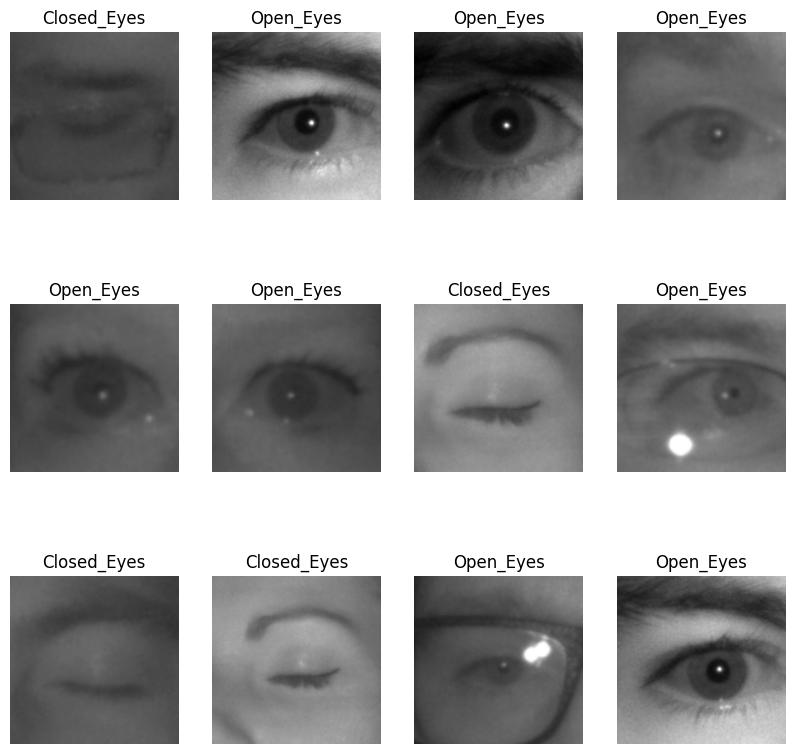

In [ ]:
#converting floating images to uint8
for image_batch , label_batch in dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

125

In [ ]:
train_size = 0.8
splitter = len(dataset)*train_size

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
testing_set = dataset.skip(54)
div_t = len(dataset)*0.1
div_t

12.5

In [ ]:
vol_set = testing_set.take(6)

In [ ]:
testing_set = testing_set.skip(6)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vol_set = vol_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_set = testing_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(128, activation='relu')(x) 
predictions = Dense(1, activation='sigmoid')(x) 

model_mobile = models.Model(inputs=base_model.input, outputs=predictions)

model_mobile.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])


model_mobile.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']      

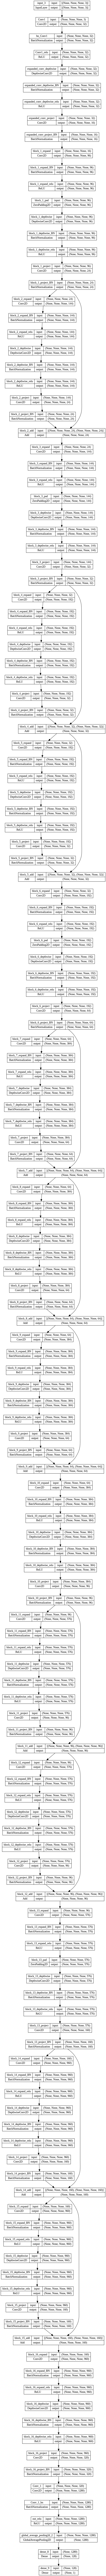

In [ ]:
tf.keras.utils.plot_model(model_mobile, to_file='model_architecture.png', show_shapes=True)

In [ ]:
history = model_mobile.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=vol_set
)

Epoch 1/50
54/54 [==============================] - 17s 171ms/step - loss: 0.4162 - accuracy: 0.7917 - val_loss: 0.2743 - val_accuracy: 0.9010
Epoch 2/50
54/54 [==============================] - 4s 68ms/step - loss: 0.2509 - accuracy: 0.9074 - val_loss: 0.2086 - val_accuracy: 0.9167
Epoch 3/50
54/54 [==============================] - 3s 64ms/step - loss: 0.1787 - accuracy: 0.9416 - val_loss: 0.1578 - val_accuracy: 0.9583
Epoch 4/50
54/54 [==============================] - 3s 64ms/step - loss: 0.1377 - accuracy: 0.9578 - val_loss: 0.1102 - val_accuracy: 0.9583
Epoch 5/50
54/54 [==============================] - 4s 71ms/step - loss: 0.1142 - accuracy: 0.9624 - val_loss: 0.0988 - val_accuracy: 0.9635
Epoch 6/50
54/54 [==============================] - 4s 74ms/step - loss: 0.0902 - accuracy: 0.9676 - val_loss: 0.0723 - val_accuracy: 0.9740
Epoch 7/50
54/54 [==============================] - 3s 64ms/step - loss: 0.0921 - accuracy: 0.9659 - val_loss: 0.0812 - val_accuracy: 0.9635
Epoch 8/50


In [ ]:
model_mobile.save("model_mobile.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_SIZE, IMAGE_SIZE)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D((2,2)),



    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation="sigmoid"),

])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

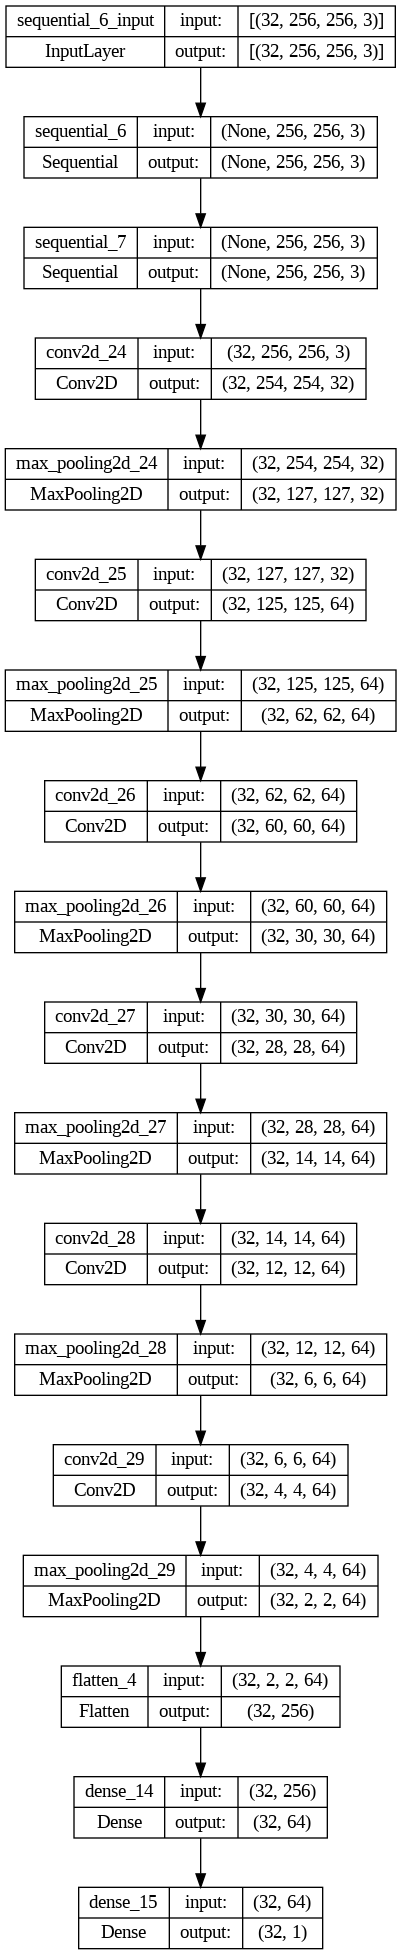

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
model.compile(optimizer='Adam',
             loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=["accuracy"]
             )

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=vol_set
)

Epoch 1/50
54/54 [==============================] - 8s 69ms/step - loss: 0.4905 - accuracy: 0.7581 - val_loss: 0.0839 - val_accuracy: 0.9740
Epoch 2/50
54/54 [==============================] - 3s 63ms/step - loss: 0.1190 - accuracy: 0.9578 - val_loss: 0.0956 - val_accuracy: 0.9792
Epoch 3/50
54/54 [==============================] - 3s 64ms/step - loss: 0.1108 - accuracy: 0.9601 - val_loss: 0.0648 - val_accuracy: 0.9688
Epoch 4/50
54/54 [==============================] - 3s 64ms/step - loss: 0.0749 - accuracy: 0.9745 - val_loss: 0.1044 - val_accuracy: 0.9479
Epoch 5/50
54/54 [==============================] - 4s 66ms/step - loss: 0.0510 - accuracy: 0.9826 - val_loss: 0.0514 - val_accuracy: 0.9896
Epoch 6/50
54/54 [==============================] - 3s 64ms/step - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.0359 - val_accuracy: 0.9844
Epoch 7/50
54/54 [==============================] - 3s 64ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.0293 - val_accuracy: 0.9844
Epoch 8/50
54

In [ ]:
model.save('model.h5')

In [ ]:
model = tf.keras.models.load_model("model.h5")

In [ ]:
model.evaluate(testing_set)

65/65 [==============================] - 2s 22ms/step - loss: 0.0365 - accuracy: 0.9909


[0.03646264225244522, 0.9908654093742371]

In [ ]:
history.params
acc = history.history['accuracy']
accuracy_per = history.history['val_accuracy']

loss = history.history['loss']
per_l = history.history['val_loss']

Text(0.5, 1.0, 'plotting the trian and val loss')

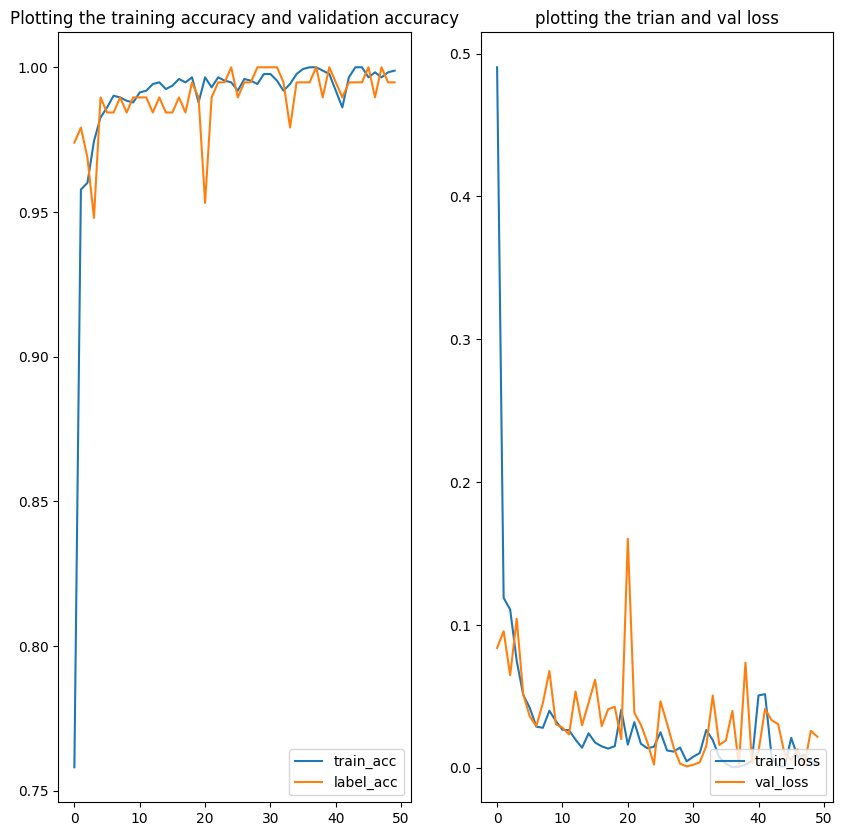

In [ ]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label="train_acc")
plt.plot(range(EPOCHS), accuracy_per, label="label_acc")
plt.legend(loc="lower right")
plt.title("Plotting the training accuracy and validation accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="train_loss")
plt.plot(range(EPOCHS), per_l, label="val_loss")
plt.legend(loc="lower right")
plt.title("plotting the trian and val loss")

In [ ]:
model = tf.keras.models.load_model("./model.h5")

In [ ]:
class_names

['Closed_Eyes', 'Open_Eyes']

1/1 [==============================] - 0s 190ms/step
pred_label [0.00067054]
pred_label [0.00067054]
Closed_Eyes
1/1 [==============================] - 0s 40ms/step
pred_label [1.]
pred_label [1.]
Open_Eyes


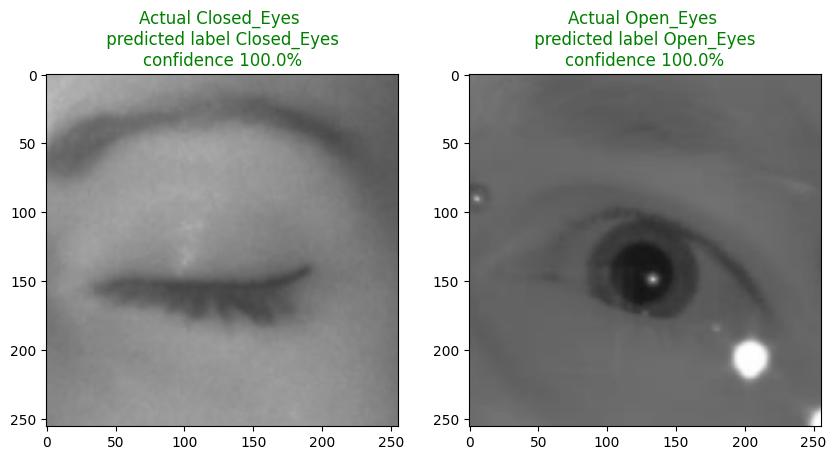

In [ ]:

plt.figure(figsize=(10,10))
for image_batch, label_batch in testing_set.take(1):
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        actual_label = class_names[label_batch[i]]

        pred_label = model.predict(image_batch)
        print("pred_label", pred_label[i])

        print("pred_label", pred_label[i])

        pred_label_conf = round(np.max(pred_label)*100, 2)
        pred_label = class_names[0 if pred_label[i] < 0.5 else 1]
        print(pred_label)

        if actual_label == pred_label:
            plt.title(f"Actual {actual_label} \n predicted label {pred_label} \nconfidence {pred_label_conf}%" ,color="green")
        else:
            plt.title(f"Actual {actual_label} \n predicted label {pred_label} \nconfidence {pred_label_conf}%", color="red")

In [ ]:
# calling a function for an image prediction

def predict(model , image):
    img = tf.keras.preprocessing.image.img_to_array(image)
    reshape = tf.expand_dims(img, 0)

    predict = model.predict(reshape)

    print(predict)

In [ ]:
for image_32_batch, label_32_batch in testing_set.take(1):
    print(image_32_batch[0].numpy().shape)
    predict(model, image_32_batch[0])

(256, 256, 3)
1/1 [==============================] - 0s 363ms/step
[[0.00427388]]


In [ ]:
predictions = model.predict(testing_set)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in testing_set], axis=0)

print(classification_report(true_labels, predicted_labels, target_names=['Closed_Eyes', 'Open_Eyes']))


65/65 [==============================] - 2s 26ms/step
              precision    recall  f1-score   support

 Closed_Eyes       0.49      1.00      0.66      1029
   Open_Eyes       0.00      0.00      0.00      1051

    accuracy                           0.49      2080
   macro avg       0.25      0.50      0.33      2080
weighted avg       0.24      0.49      0.33      2080



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions = model_mobile.predict(testing_set)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in testing_set], axis=0)

print(classification_report(true_labels, predicted_labels, target_names=['Closed_Eyes', 'Open_Eyes']))

65/65 [==============================] - 6s 63ms/step
              precision    recall  f1-score   support

 Closed_Eyes       0.49      1.00      0.66      1029
   Open_Eyes       0.00      0.00      0.00      1051

    accuracy                           0.49      2080
   macro avg       0.25      0.50      0.33      2080
weighted avg       0.24      0.49      0.33      2080



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
